This tutorial is an exercise in self-assessment of your X knowledge. It contains examples of how to perform a variety of tasks. The proposed examples can not be exhaustive I strongly recommend that you ask yourself how to perform each of these examples in general. And not to limit yourself to answer the questions. The proposed solutions are only one possibility among others and do not pretend to be the most efficient way to solve these exercises

## Data transformation

#### Install and load a package

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



#### Upload CSV provided for this session, and load it.

Note : You should be able to load data from various format text, excel, SAS or Stata file.

Note2 : If your file cannot be parsed, check the delimiter/separator between attributes' values in the provided csv file and update the delimiter argument passed to the reading function

In [2]:
df = read.csv('DATASET G1.csv', sep=";",na.strings=".")  

#### Get datatype of each column

In [3]:
str(df)

'data.frame':	20000 obs. of  17 variables:
 $ CHA_id_departement_P       : chr  "1" "1" "1" "1" ...
 $ CHA_id_sex_P               : int  1 1 1 1 1 1 1 2 1 2 ...
 $ CHA_age                    : num  46.1 66.8 50.3 38.2 81.8 ...
 $ CHA_BMI                    : num  25.7 22.8 23.9 26 35.1 ...
 $ BIO_cholesterolemia        : num  NA NA NA NA NA NA NA NA NA NA ...
 $ ATC_COPD                   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ATC_HeartFailure           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ATC_arteriopathy           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ATC_hypercholesterolemia   : int  0 1 0 0 1 0 0 0 1 0 ...
 $ ATC_hypertriglyceridemia   : int  0 0 0 0 1 0 0 NA NA 0 ...
 $ SYM_snoring                : int  1 1 1 1 1 1 1 1 1 1 ...
 $ SYM_snoring_scale          : int  7 5 1 4 5 4 3 6 8 10 ...
 $ SYM_Daytimesleepiness      : int  1 1 1 1 1 1 0 1 1 1 ...
 $ SYM_Daytimesleepiness_scale: int  3 5 1 9 1 8 NA 3 8 6 ...
 $ SYM_Epworth_scale          : int  12 8 12 16 3 18 5 12 14 19 ...
 $ classe_atc_1  

#### Quickly check what your data look like

In [4]:
head(df)

,CHA_id_departement_P,CHA_id_sex_P,CHA_age,CHA_BMI,BIO_cholesterolemia,ATC_COPD,ATC_HeartFailure,ATC_arteriopathy,ATC_hypercholesterolemia,ATC_hypertriglyceridemia,SYM_snoring,SYM_snoring_scale,SYM_Daytimesleepiness,SYM_Daytimesleepiness_scale,SYM_Epworth_scale,classe_atc_1,id
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>
1,1,1,46.122,25.6896,NA,0,0,0,0,0,1,7,1,3,12,DIHYDROERGOTAMINE,1
2,1,1,66.768,22.8329,NA,0,0,0,1,0,1,5,1,5,8,ACETYLSALICYLIQUE ACIDE,2
3,1,1,50.316,23.8751,NA,0,0,0,0,0,1,1,1,1,12,PAROXETINE,3
4,1,1,38.182,26.0044,NA,0,0,0,0,0,1,4,1,9,16,,4
5,1,1,81.804,35.0765,NA,0,0,0,1,1,1,5,1,1,3,CANDESARTAN,5
6,1,1,36.627,31.7901,NA,0,0,0,0,0,1,4,1,8,18,,6


### Subset data by row (get distinct row or row matching a condition)

#### Select only patients from Isère department (38)

Note: the department attribute may not be in a numeric format

In [5]:
Isere <- df['CHA_id_departement_P'] == "38"
data_isere <- df[Isere]

#### Select male patients with BMI > 30, and either older than 45 years or with heart failure            

In [6]:
df[(df['CHA_BMI'] > 30) & ((df['CHA_age'] > 45) | (df['ATC_HeartFailure'] == 1)),]  %>% head

,CHA_id_departement_P,CHA_id_sex_P,CHA_age,CHA_BMI,BIO_cholesterolemia,ATC_COPD,ATC_HeartFailure,ATC_arteriopathy,ATC_hypercholesterolemia,ATC_hypertriglyceridemia,SYM_snoring,SYM_snoring_scale,SYM_Daytimesleepiness,SYM_Daytimesleepiness_scale,SYM_Epworth_scale,classe_atc_1,id
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>
5,1,1,81.804,35.0765,NA,0,0,0,1,1,1,5,1,1,3,CANDESARTAN,5
11,1,2,79.127,33.6728,NA,0,0,0,0,0,1,6,1,5,10,,11
13,1,1,68.227,30.7958,NA,0,0,0,0,0,1,7,1,2,9,BISOPROLOL ET THIAZIDIQUES,13
18,1,2,59.614,33.3050,NA,0,0,0,1,1,1,8,1,6,11,FENOFIBRATE,18
26,1,1,51.650,31.3146,NA,0,0,0,1,0,1,10,1,3,9,LANSOPRAZOLE,26
33,1,1,69.758,34.3396,NA,0,0,0,0,0,1,7,1,3,12,CANDESARTAN,33


### Subset data by column

#### Create a new dataframe with only ATC and SYM column

In [7]:
df  %>% select(starts_with('ATC_'),starts_with('SYM_')) %>% head

,ATC_COPD,ATC_HeartFailure,ATC_arteriopathy,ATC_hypercholesterolemia,ATC_hypertriglyceridemia,SYM_snoring,SYM_snoring_scale,SYM_Daytimesleepiness,SYM_Daytimesleepiness_scale,SYM_Epworth_scale
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,0,0,0,1,7,1,3,12
2,0,0,0,1,0,1,5,1,5,8
3,0,0,0,0,0,1,1,1,1,12
4,0,0,0,0,0,1,4,1,9,16
5,0,0,0,1,1,1,5,1,1,3
6,0,0,0,0,0,1,4,1,8,18


### Summarize one, multiple or all column

#### Display the descriptive statistics of one column

In [8]:
# one column
summary(df$CHA_BMI)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  9.463  25.970  29.688  30.719  34.413  60.000     915 

#### Display the descriptive statistics of multiple columns

In [9]:
# three column
df  %>% select(CHA_BMI,BIO_cholesterolemia)  %>% summary

    CHA_BMI       BIO_cholesterolemia
 Min.   : 9.463   Min.   :0.650      
 1st Qu.:25.970   1st Qu.:1.770      
 Median :29.688   Median :2.060      
 Mean   :30.719   Mean   :2.143      
 3rd Qu.:34.413   3rd Qu.:2.360      
 Max.   :60.000   Max.   :7.400      
 NA's   :915      NA's   :18691      

#### Display the descriptive statistics of all columns

In [10]:
# all column
summary(df)

 CHA_id_departement_P  CHA_id_sex_P      CHA_age          CHA_BMI      
 Length:20000         Min.   :1.000   Min.   : 18.05   Min.   : 9.463  
 Class :character     1st Qu.:1.000   1st Qu.: 45.80   1st Qu.:25.970  
 Mode  :character     Median :1.000   Median : 56.08   Median :29.688  
                      Mean   :1.349   Mean   : 55.22   Mean   :30.719  
                      3rd Qu.:2.000   3rd Qu.: 65.04   3rd Qu.:34.413  
                      Max.   :2.000   Max.   :100.00   Max.   :60.000  
                      NA's   :43                       NA's   :915     
 BIO_cholesterolemia    ATC_COPD      ATC_HeartFailure  ATC_arteriopathy
 Min.   :0.650       Min.   :0.0000   Min.   :0.00000   Min.   :0.0000  
 1st Qu.:1.770       1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.0000  
 Median :2.060       Median :0.0000   Median :0.00000   Median :0.0000  
 Mean   :2.143       Mean   :0.0512   Mean   :0.02087   Mean   :0.0152  
 3rd Qu.:2.360       3rd Qu.:0.0000   3rd Qu.:0.00000   3rd

### Get mean, median or count for one or more column group by another column

#### Mean

In [11]:
df  %>% group_by(CHA_id_sex_P)  %>% summarise(mean = mean(CHA_BMI,na.rm = TRUE))

CHA_id_sex_P,mean
<int>,<dbl>
1,30.19550
2,31.68695
NA,31.57962


#### Median

In [12]:
df  %>% group_by(CHA_id_sex_P)  %>% summarise(median = median(BIO_cholesterolemia,na.rm = TRUE))

CHA_id_sex_P,median
<int>,<dbl>
1,2.00
2,2.13
NA,1.79


#### Count

In [13]:
df  %>% group_by(CHA_id_sex_P)  %>% summarise(n = sum(ATC_HeartFailure,na.rm = TRUE))

CHA_id_sex_P,n
<int>,<int>
1,305
2,111
NA,0


### Order a data by one or more column and in descending order

#### One column in ascending order

In [14]:
# one column 
df %>% arrange(CHA_BMI)

CHA_id_departement_P,CHA_id_sex_P,CHA_age,CHA_BMI,BIO_cholesterolemia,ATC_COPD,ATC_HeartFailure,ATC_arteriopathy,ATC_hypercholesterolemia,ATC_hypertriglyceridemia,SYM_snoring,SYM_snoring_scale,SYM_Daytimesleepiness,SYM_Daytimesleepiness_scale,SYM_Epworth_scale,classe_atc_1,id
<chr>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>
51,1,41.185,9.4625,NA,0,0,0,0,0,1,8,1,5,11,,9564
33,1,65.979,10.4786,NA,0,0,0,0,0,1,8,1,7,14,,5771
94,1,25.873,14.0292,NA,0,0,0,0,0,1,4,0,NA,2,,19689
18,1,77.347,15.2109,NA,1,0,0,0,0,NA,NA,1,6,NA,,1926
33,2,73.317,15.6147,NA,0,0,0,0,0,0,NA,0,NA,NA,ACETYLSALICYLIQUE ACIDE,6796
59,1,56.999,15.6147,2.06,0,0,0,0,0,1,NA,1,5,6,,11907
33,1,31.118,15.7407,NA,0,0,0,0,0,1,5,1,9,13,FORMOTEROL ET AUTRES MEDICAMENTS POUR SYNDROMES OBSTRUCTIFS VOIES AERIENNES,6888
60,2,55.379,15.8079,NA,0,0,0,0,0,1,NA,0,NA,0,,14527
22,1,74.475,15.8541,NA,0,0,0,0,0,1,1,0,NA,3,,3046


#### Multiple columns in descending order

In [15]:
# two column in descending orders
df %>% arrange(desc(CHA_BMI,CHA_age))

CHA_id_departement_P,CHA_id_sex_P,CHA_age,CHA_BMI,BIO_cholesterolemia,ATC_COPD,ATC_HeartFailure,ATC_arteriopathy,ATC_hypercholesterolemia,ATC_hypertriglyceridemia,SYM_snoring,SYM_snoring_scale,SYM_Daytimesleepiness,SYM_Daytimesleepiness_scale,SYM_Epworth_scale,classe_atc_1,id
<chr>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>
56,2,64.925,60.0000,NA,0,0,0,0,0,1,5,1,1,2,SALBUTAMOL,10371
77,1,55.414,59.8802,NA,0,0,0,0,0,1,NA,1,NA,15,,17551
59,2,53.895,59.6859,NA,0,0,0,0,0,1,NA,0,NA,3,FORMOTEROL ET AUTRES MEDICAMENTS POUR SYNDROMES OBSTRUCTIFS VOIES AERIENNES,12354
30,1,41.202,59.6373,NA,0,0,0,0,0,1,7,1,8,8,,4291
13,2,37.210,59.5825,NA,0,0,0,0,0,1,9,1,3,7,METFORMINE,920
18,2,41.498,59.3750,NA,0,0,0,0,0,1,4,0,NA,1,LEVOTHYROXINE SODIQUE,1928
94,2,40.019,59.1716,NA,0,0,0,0,0,1,7,1,3,14,,19731
89,2,66.094,59.0255,NA,0,1,0,1,0,1,NA,1,NA,16,,18808
33,2,28.517,58.4314,NA,0,0,0,0,0,1,7,1,7,13,,5822


### Compute the cumulative sum of each column and the difference between consecutive rows.### Create new column for example cumulative sum of previous columns, offset elements of previous column by 1, distance between two columns.

#### Compute the cumlative sum of all possible columns

In [16]:
df %>% select_if(is.numeric) %>% mutate_all(~cumsum(.))  %>% head

,CHA_id_sex_P,CHA_age,CHA_BMI,BIO_cholesterolemia,ATC_COPD,ATC_HeartFailure,ATC_arteriopathy,ATC_hypercholesterolemia,ATC_hypertriglyceridemia,SYM_snoring,SYM_snoring_scale,SYM_Daytimesleepiness,SYM_Daytimesleepiness_scale,SYM_Epworth_scale,id
,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,46.122,25.6896,NA,0,0,0,0,0,1,7,1,3,12,1
2,2,112.890,48.5225,NA,0,0,0,1,0,2,12,2,8,20,3
3,3,163.206,72.3976,NA,0,0,0,1,0,3,13,3,9,32,6
4,4,201.388,98.4020,NA,0,0,0,1,0,4,17,4,18,48,10
5,5,283.192,133.4785,NA,0,0,0,2,1,5,22,5,19,51,15
6,6,319.819,165.2686,NA,0,0,0,2,1,6,26,6,27,69,21


#### Subtract the age of the patient in the previous row from the age of each patient

In [17]:
df  %>% transmute(diff = CHA_age - lag(CHA_age))  %>% head

,diff
,<dbl>
1,NA
2,20.646
3,-16.452
4,-12.134
5,43.622
6,-45.177


### Join two or more tables (by their Id for example)

#### Create a dataframe with 15 numbers randomly chosen between 1 and 100

In [18]:
Values = round(runif(100,1,100),0)
Values

[1] 39 80 90 59 47 89 72 43 11 57 23 67 58 63 34 54 77 95 73 60 61 75 64 76 60
 [26] 78 95 92 54 88 25 17 45 82 80 99 99 49 80  5 24 13 39 68 39 73 82 53 90 13
 [51] 10 67 39 13 93 43 67 35 76  4 89 78 70 24 73 45 21 98 63 78 50 38 15 27 18
 [76] 66 83 41 47 60 71 18 77 48 51 30 10 55 87 81 95 58 14 74 60 36  6 22 87 98

#### Find all the lines whose department appears in the previously generated values


In [19]:
df  %>% filter(CHA_id_departement_P %in% Values)

CHA_id_departement_P,CHA_id_sex_P,CHA_age,CHA_BMI,BIO_cholesterolemia,ATC_COPD,ATC_HeartFailure,ATC_arteriopathy,ATC_hypercholesterolemia,ATC_hypertriglyceridemia,SYM_snoring,SYM_snoring_scale,SYM_Daytimesleepiness,SYM_Daytimesleepiness_scale,SYM_Epworth_scale,classe_atc_1,id
<chr>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>
10,2,23.967,24.6559,NA,0,0,0,0,0,1,8,1,6,11,,117
10,1,74.048,37.5510,NA,0,0,0,0,0,1,6,1,1,NA,BETAMETHASONE,118
10,1,56.939,25.1024,NA,0,0,0,0,0,1,5,1,3,10,LEVOTHYROXINE SODIQUE,119
10,1,43.978,24.6354,2.10,0,0,0,0,0,1,10,1,9,16,,120
10,1,71.450,25.9107,NA,0,0,0,0,0,1,1,1,1,3,,121
10,2,61.079,31.2026,NA,0,0,0,0,0,1,1,0,NA,5,,122
10,1,38.836,38.6445,NA,1,0,0,0,0,1,10,1,4,7,,123
10,1,69.826,23.8367,NA,0,0,0,0,0,1,5,1,9,9,CANDESARTAN,124
10,2,74.352,19.6283,NA,0,0,0,0,0,1,7,1,5,9,,125


### Handle missing value (remove all missing value, or replace it)

#### Remove all rows with missing values

In [20]:
df  %>% drop_na()

# If you are wondering, why there is a difference with the same dataframe in python look at "classe_atc_1" 
# And how different read csv function handle differently empty string. 
# If you want the same dataframe as in python replace na.strings="." by na.strings=c(".","")

CHA_id_departement_P,CHA_id_sex_P,CHA_age,CHA_BMI,BIO_cholesterolemia,ATC_COPD,ATC_HeartFailure,ATC_arteriopathy,ATC_hypercholesterolemia,ATC_hypertriglyceridemia,SYM_snoring,SYM_snoring_scale,SYM_Daytimesleepiness,SYM_Daytimesleepiness_scale,SYM_Epworth_scale,classe_atc_1,id
<chr>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>
10,1,43.978,24.6354,2.10,0,0,0,0,0,1,10,1,9,16,,120
10,2,50.585,24.3375,1.94,0,0,0,0,0,1,10,1,8,13,,126
10,1,45.717,35.1852,2.46,0,0,0,0,0,1,7,1,7,14,TELMISARTAN,155
10,1,52.479,33.9506,2.49,0,0,0,1,0,1,10,1,10,16,,160
10,1,55.184,32.0988,2.88,0,0,0,1,0,1,8,1,3,8,,175
10,1,51.023,32.6531,7.17,0,0,0,1,0,1,9,1,9,18,FENOFIBRATE,188
10,1,62.675,40.2647,1.78,0,0,1,0,0,1,7,1,4,9,TRIMETAZIDINE,206
10,2,56.871,39.4477,2.81,0,0,0,1,0,1,8,1,3,8,CAPTOPRIL,212
10,1,44.701,37.0370,1.67,0,0,0,1,0,1,8,1,3,11,GLIMEPIRIDE,215


#### Replace missing data in all the numeric columns with the median value of the subset having the same daytime sleepiness ("SYM_somnolenceDiurne") 

In [21]:
df_impute <- df %>% 
    select_if(is.numeric) %>%
    group_by(SYM_Daytimesleepiness) %>% 
    mutate_at(vars(-group_cols()),~ifelse(is.na(.),median(.,na.rm=TRUE), .)) 

#### Have all missing values been imputed ? If not, why ?

In [22]:
df_impute %>% 
    select_if(is.numeric) %>%
    summarise_all(~sum(is.na(.)))


SYM_Daytimesleepiness,CHA_id_sex_P,CHA_age,CHA_BMI,BIO_cholesterolemia,ATC_COPD,ATC_HeartFailure,ATC_arteriopathy,ATC_hypercholesterolemia,ATC_hypertriglyceridemia,SYM_snoring,SYM_snoring_scale,SYM_Daytimesleepiness_scale,SYM_Epworth_scale,id
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,0,0,6326,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
# if there is no daytimes sleepiness there is no daytime sleepiness scale
# So imputation is impossible because if SYM_somnolenceDiurne=0 SYM_somnolenceDiurne_echelle is always nan

df_impute %>% filter(is.na(SYM_Daytimesleepiness_scale)) %>% head

CHA_id_sex_P,CHA_age,CHA_BMI,BIO_cholesterolemia,ATC_COPD,ATC_HeartFailure,ATC_arteriopathy,ATC_hypercholesterolemia,ATC_hypertriglyceridemia,SYM_snoring,SYM_snoring_scale,SYM_Daytimesleepiness,SYM_Daytimesleepiness_scale,SYM_Epworth_scale,id
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>
1,40.496,33.6327,2.05,0,0,0,0,0,1,3,0,NA,5,7
1,58.385,27.7744,2.05,0,0,0,0,0,1,5,0,NA,5,14
2,75.759,26.2985,2.05,0,0,0,0,0,1,5,0,NA,6,28
2,64.216,25.7110,2.05,0,1,0,0,0,1,5,0,NA,3,40
1,27.239,43.0277,2.05,0,0,0,0,0,1,4,0,NA,7,57
2,51.231,36.0519,2.05,0,0,0,0,0,1,10,0,NA,5,67


### Reshape data from wide to long 

#### Unpivot the dataset to long format with an 'id', a 'Labels' and a  'Values' columns

In [24]:
df %>% 
    mutate_all(as.character) %>% 
    pivot_longer(-id, names_to = "Labels",values_to = "Values") %>%
    head

id,Labels,Values
<chr>,<chr>,<chr>
1,CHA_id_departement_P,1
1,CHA_id_sex_P,1
1,CHA_age,46.122
1,CHA_BMI,25.6896
1,BIO_cholesterolemia,NA
1,ATC_COPD,0


#### Unpivot columns starting with 'ATC_' to long format with an 'id', a 'Labels' and a  'Values' columns

In [25]:
df %>% 
    mutate_all(as.character) %>% 
    select(id,starts_with('ATC_')) %>%
    pivot_longer(cols =-id, names_to = "Labels",values_to = "Values") %>%
    head

id,Labels,Values
<chr>,<chr>,<chr>
1,ATC_COPD,0
1,ATC_HeartFailure,0
1,ATC_arteriopathy,0
1,ATC_hypercholesterolemia,0
1,ATC_hypertriglyceridemia,0
2,ATC_COPD,0


## Data visualization

Note : You must be able to choose the right plot depending on data type (continuous, discrete).

### Plot the distribution of BIO_cholesterolemieTotale 

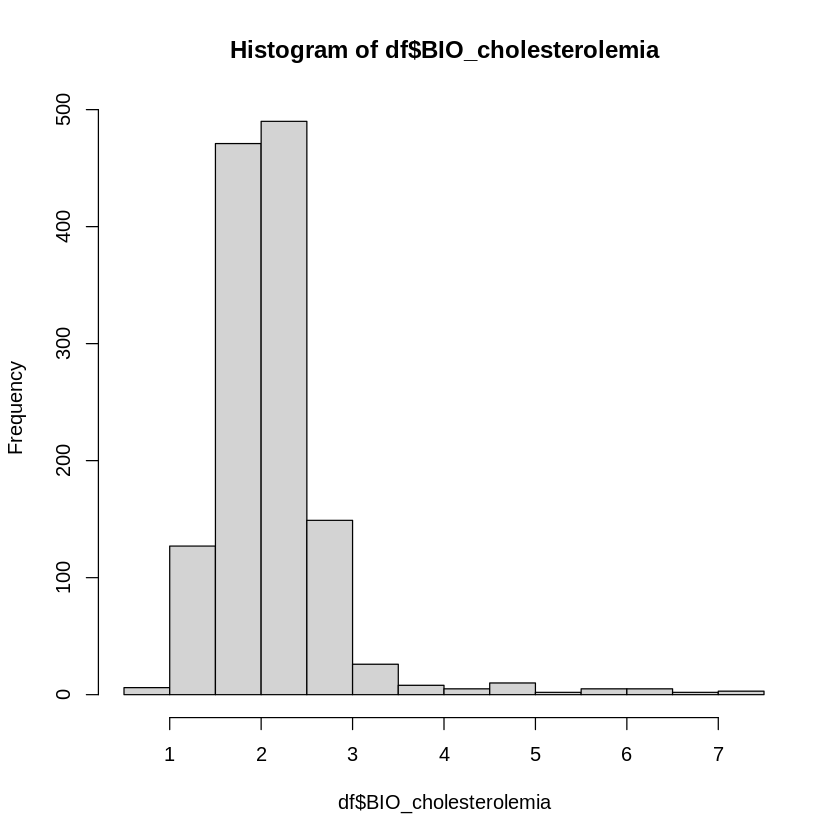

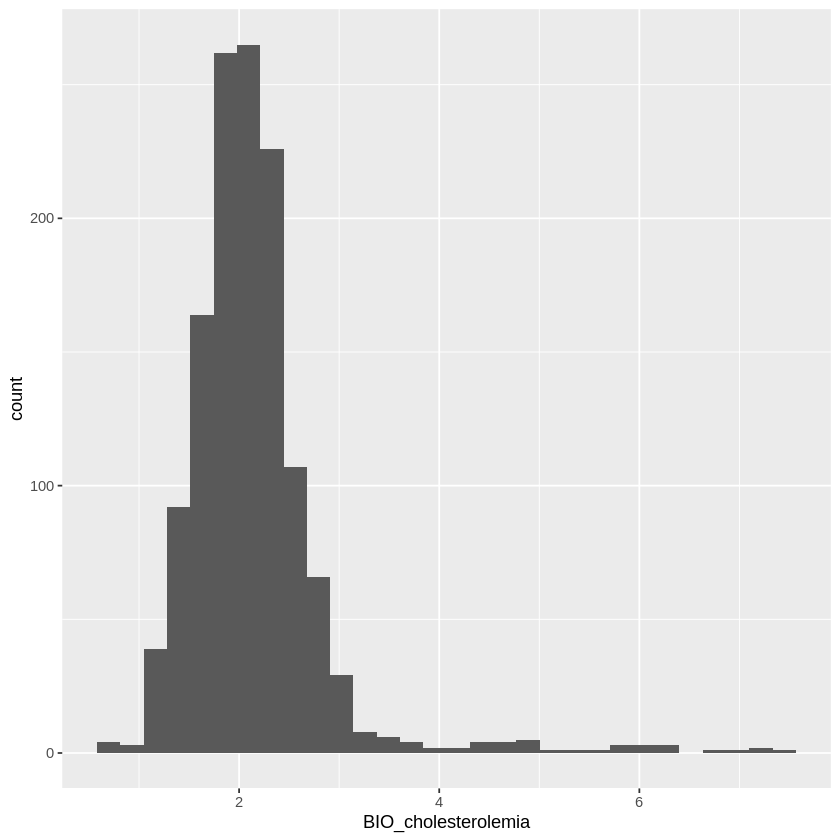

In [26]:
hist(df$BIO_cholesterolemia)

# or with ggplot
df %>% 
    drop_na(BIO_cholesterolemia) %>%
    ggplot() +
        geom_histogram(aes(BIO_cholesterolemia),
                       bins = 30)

### Plot the descriptive statistics of CHA_BMI and SYM_echelleEpworth side by side 

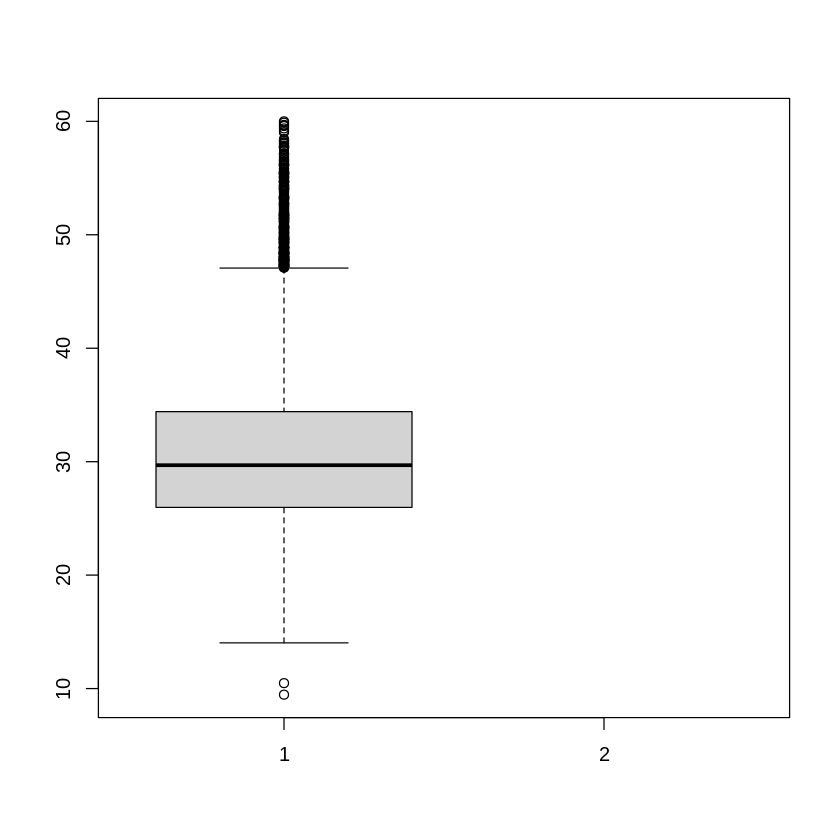

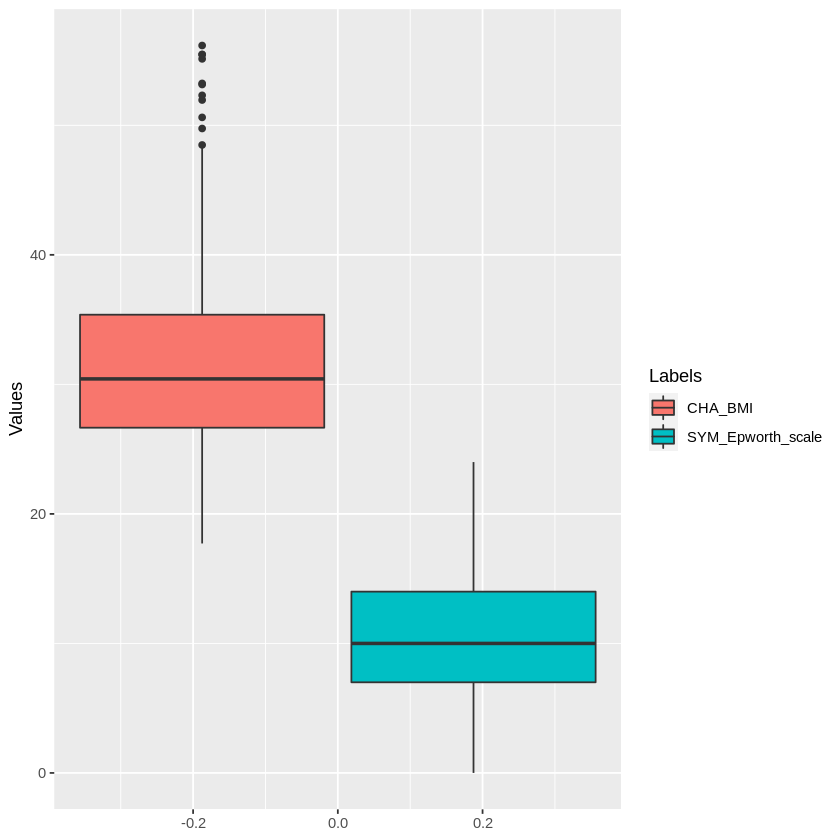

In [27]:
boxplot(df$CHA_BMI,df$SYM_echelleEpworth)

# or with ggplot
df %>% 
    pivot_longer(c(CHA_BMI,SYM_Epworth_scale), names_to = "Labels",values_to = "Values") %>%
    drop_na() %>%
    ggplot() +
        geom_boxplot(aes(y = Values, fill = Labels))

### Plot BIO_cholesterolemieTotale against CHA_BMI with colors depending on CHA_id_sexe_P

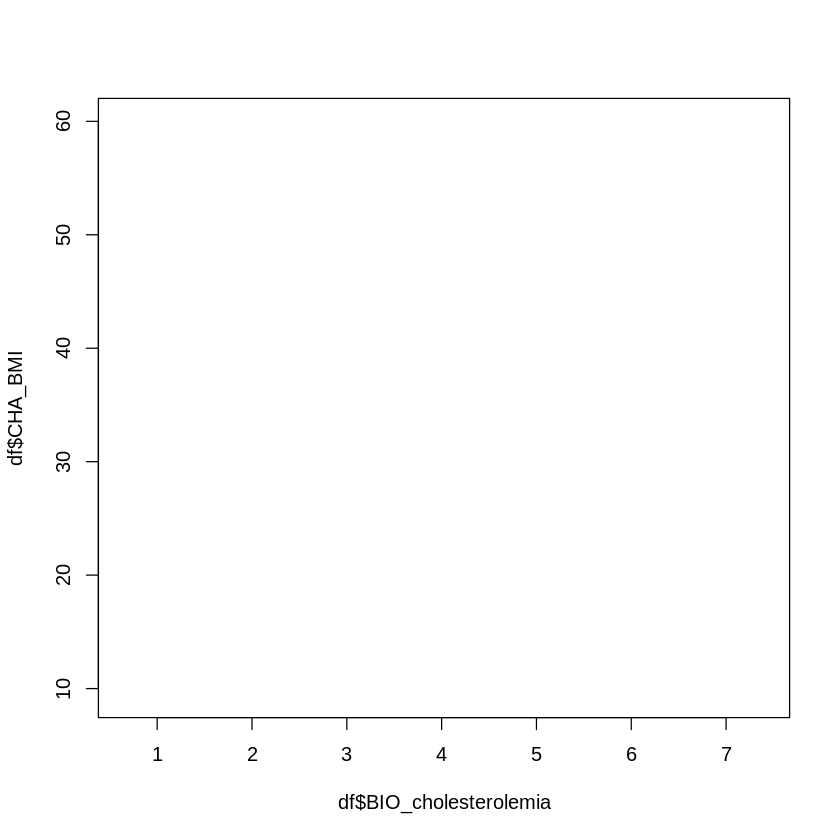

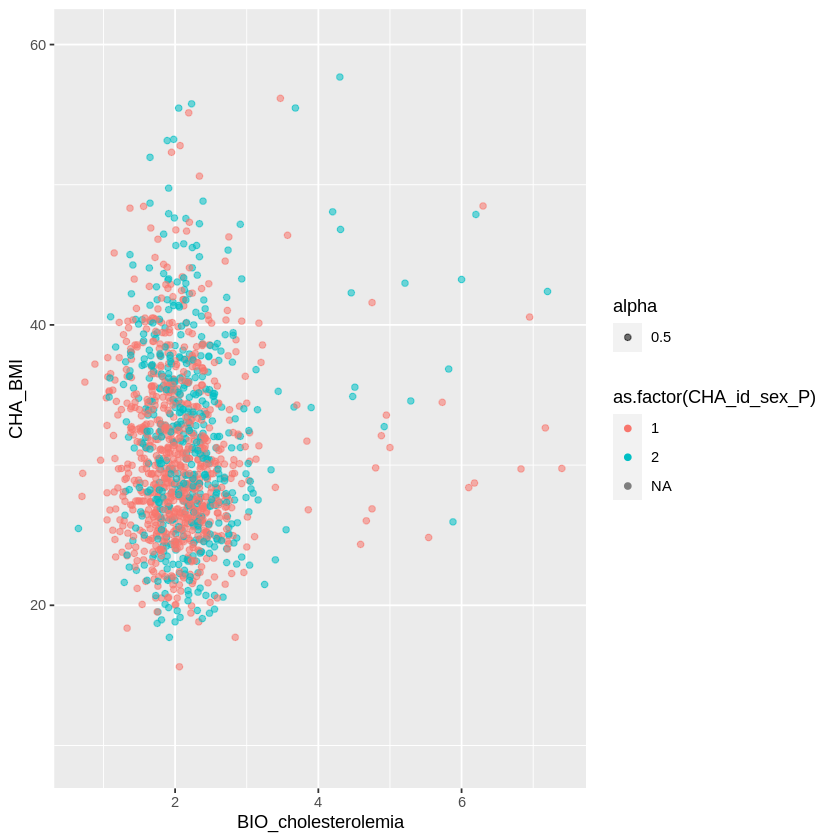

In [28]:

plot(df$BIO_cholesterolemia, df$CHA_BMI,col = df$CHA_id_sexe_P)



# or with ggplot
df %>% 
    #pivot_longer(c(CHA_BMI,SYM_echelleEpworth), names_to = "Labels",values_to = "Values") %>%

    ggplot() +
        geom_point(aes(x = BIO_cholesterolemia,y = CHA_BMI , colour = as.factor(CHA_id_sex_P),alpha = 0.5),
                   na.rm = TRUE)

## Basic Programming skills

#### Iterate through some data structure using a loop (For or While)

In solution i print dataframe column names

In [29]:
for (i in colnames(df)){
    print(i)
}


[1] "CHA_id_departement_P"
[1] "CHA_id_sex_P"
[1] "CHA_age"
[1] "CHA_BMI"
[1] "BIO_cholesterolemia"
[1] "ATC_COPD"
[1] "ATC_HeartFailure"
[1] "ATC_arteriopathy"
[1] "ATC_hypercholesterolemia"
[1] "ATC_hypertriglyceridemia"
[1] "SYM_snoring"
[1] "SYM_snoring_scale"
[1] "SYM_Daytimesleepiness"
[1] "SYM_Daytimesleepiness_scale"
[1] "SYM_Epworth_scale"
[1] "classe_atc_1"
[1] "id"


In [30]:
i <- 1
while (i<ncol(df)) {  
        print(colnames(df)[i])
        i <- i + 1
}

[1] "CHA_id_departement_P"
[1] "CHA_id_sex_P"
[1] "CHA_age"
[1] "CHA_BMI"
[1] "BIO_cholesterolemia"
[1] "ATC_COPD"
[1] "ATC_HeartFailure"
[1] "ATC_arteriopathy"
[1] "ATC_hypercholesterolemia"
[1] "ATC_hypertriglyceridemia"
[1] "SYM_snoring"
[1] "SYM_snoring_scale"
[1] "SYM_Daytimesleepiness"
[1] "SYM_Daytimesleepiness_scale"
[1] "SYM_Epworth_scale"
[1] "classe_atc_1"


#### Test a condition using IF statement

Using a and b vectors below print a statment if a is greater than b and another if a is lesser than b and a third statment if a equals b.

In [31]:
n = 5


a = runif(n)

b = runif(n)


In [32]:
for (i in 1:n){
    if (b[i] > a[i]){
        print("b is greater than a")
    } else if (b[i] < a[i]){
        print("b is lesser than a")
    } else {
        print("b equals a")
    }
}

[1] "b is greater than a"
[1] "b is greater than a"
[1] "b is lesser than a"
[1] "b is greater than a"
[1] "b is lesser than a"


#### Create a simple function which determines the root of a number

In [33]:
   
my_function <- function(x) {
    print(x**(1/2))
}
my_function(3)

[1] 1.732051


### Basic string manipulation (e.g.: detect a string containing a specific substring or remove part of a string)


#### Lower the strings in column classe_atc_1

In [34]:
tolower(df$classe_atc_1) %>% head

[1] "dihydroergotamine"       "acetylsalicylique acide"
[3] "paroxetine"              ""                       
[5] "candesartan"             ""

#### In column classe_atc_1, find all the rows containing "," or "et"

In [35]:
df$classe_atc_1[str_detect(df$classe_atc_1,'\\sET\\s|,')] %>% head

[1] "BISOPROLOL ET THIAZIDIQUES"                                                 
[2] "SALMETEROL ET AUTRES MEDICAMENTS POUR SYNDROMES OBSTRUCTIFS VOIES AERIENNES"
[3] "PERINDOPRIL ET AMLODIPINE"                                                  
[4] "PERINDOPRIL ET DIURETIQUES"                                                 
[5] "FORMOTEROL ET AUTRES MEDICAMENTS POUR SYNDROMES OBSTRUCTIFS VOIES AERIENNES"
[6] "PERINDOPRIL ET DIURETIQUES"

#### Among the drugs listed, some belong to a class of antihypertensive drugs called sartans. All sartans end with "sartan", e.g. candesartan. Remove all words ending by sartans.

In [36]:
str_replace(df$classe_atc_1,'\\w+SARTAN\\set\\s?|\\w+SARTAN\\s?','') %>% head

[1] "DIHYDROERGOTAMINE"       "ACETYLSALICYLIQUE ACIDE"
[3] "PAROXETINE"              ""                       
[5] ""                        ""

#### Save your results in a CSV file or other format.

In [37]:
write.csv(df,"end_of_td.csv")